In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE


df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [13]:
df.isna()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df_encode = pd.get_dummies(df, columns=['Class'], dtype=int)
df_encode

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,...,0.001852,0.668237,0.995222,0,0,0,1,0,0,0


In [15]:
z_scores = stats.zscore(df_encode)

df = df_encode[~(np.abs(z_scores) > 3).any(axis=1)]
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,...,0.003153,0.853270,0.999236,0,0,0,0,0,1,0
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,...,0.003242,0.871186,0.999049,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,...,0.001852,0.668237,0.995222,0,0,0,1,0,0,0


In [16]:
import numpy as np
import random

def create_initial_population(pop_size, data, num_clusters):
    return [np.random.randint(0, num_clusters, data.shape[0]) for _ in range(pop_size)]

def calculate_centroids(data, cluster_assignments, num_clusters):
    centroids = []
    for cluster in range(num_clusters):
        cluster_points = data[cluster_assignments == cluster]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
        else:
            centroid = np.random.uniform(data.min(axis=0), data.max(axis=0))
        centroids.append(centroid)
    return np.array(centroids)

def assign_to_clusters(data, centroids):
    return np.array([
        np.argmin(np.linalg.norm(point - centroids, axis=1)) 
        for point in data.values
    ])

def compute_fitness(data, cluster_assignments, num_clusters):
    centroids = calculate_centroids(data, cluster_assignments, num_clusters)
    sse = sum(
        np.sum(np.linalg.norm(cluster_points - centroids[cluster], axis=1) ** 2)
        for cluster in range(num_clusters)
        if (cluster_points := data[cluster_assignments == cluster]).size > 0
    )
    return sse 

def select_best_parents(population, fitness_scores):
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0])]
    return sorted_population[:2]

def perform_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    return (
        np.concatenate([parent1[:crossover_point], parent2[crossover_point:]]),
        np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
    )

def apply_mutation(individual, mutation_prob, num_clusters):
    return np.array([
        random.randint(0, num_clusters - 1) if random.random() < mutation_prob else gene 
        for gene in individual
    ])

def select_top_individuals(population, fitness_scores, num_top_individuals):
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0])]
    return sorted_population[:num_top_individuals]

def genetic_clustering_algorithm(num_generations, pop_size, data, num_clusters, mutation_prob):
    population = create_initial_population(pop_size, data, num_clusters)
    
    for generation in range(num_generations):
        fitness_scores = [compute_fitness(data, individual, num_clusters) for individual in population]
        new_population = select_top_individuals(population, fitness_scores, pop_size // 2)
        
        while len(new_population) < pop_size:
            parent1, parent2 = select_best_parents(population, fitness_scores)
            offspring1, offspring2 = perform_crossover(parent1, parent2)
            new_population.extend([
                apply_mutation(offspring1, mutation_prob, num_clusters),
                apply_mutation(offspring2, mutation_prob, num_clusters)
            ])
        
        population = new_population[:pop_size]
        best_individual = min(population, key=lambda ind: compute_fitness(data, ind, num_clusters))
        print(f"Generation {generation + 1}: Best Individual = {best_individual}, Fitness = {compute_fitness(data, best_individual, num_clusters):0.2f}")
        
        mutation_prob *= 0.95
    
    return best_individual


In [17]:

generations = 2
population_size = 50
mutation_rate = 0.1

sse_ga_list = []
for k in range(1, 15):
    best_solution = genetic_clustering_algorithm(generations, population_size, df, k, mutation_rate)
    ga_clusters = best_solution
    sse_ga = compute_fitness(df, ga_clusters, k)
    sse_ga_list.append(sse_ga)



Generation 1: Best Individual = [0 0 0 ... 0 0 0], Fitness = 5243579247819.90
Generation 2: Best Individual = [0 0 0 ... 0 0 0], Fitness = 5243579247819.90
Generation 1: Best Individual = [1 0 0 ... 0 1 0], Fitness = 5240420906530.28
Generation 2: Best Individual = [1 0 0 ... 0 1 0], Fitness = 5239622530045.13
Generation 1: Best Individual = [0 0 2 ... 1 1 1], Fitness = 5236953092556.43
Generation 2: Best Individual = [0 0 1 ... 1 1 1], Fitness = 5234715893898.39
Generation 1: Best Individual = [2 0 3 ... 3 2 2], Fitness = 5238273446453.65
Generation 2: Best Individual = [3 0 2 ... 3 2 2], Fitness = 5238123963442.66
Generation 1: Best Individual = [3 3 1 ... 0 1 2], Fitness = 5232256255345.50
Generation 2: Best Individual = [3 3 1 ... 2 3 1], Fitness = 5231243183053.65
Generation 1: Best Individual = [4 4 0 ... 4 4 4], Fitness = 5234637786801.27
Generation 2: Best Individual = [4 4 0 ... 2 4 4], Fitness = 5232950629631.28
Generation 1: Best Individual = [3 0 0 ... 5 3 1], Fitness = 523

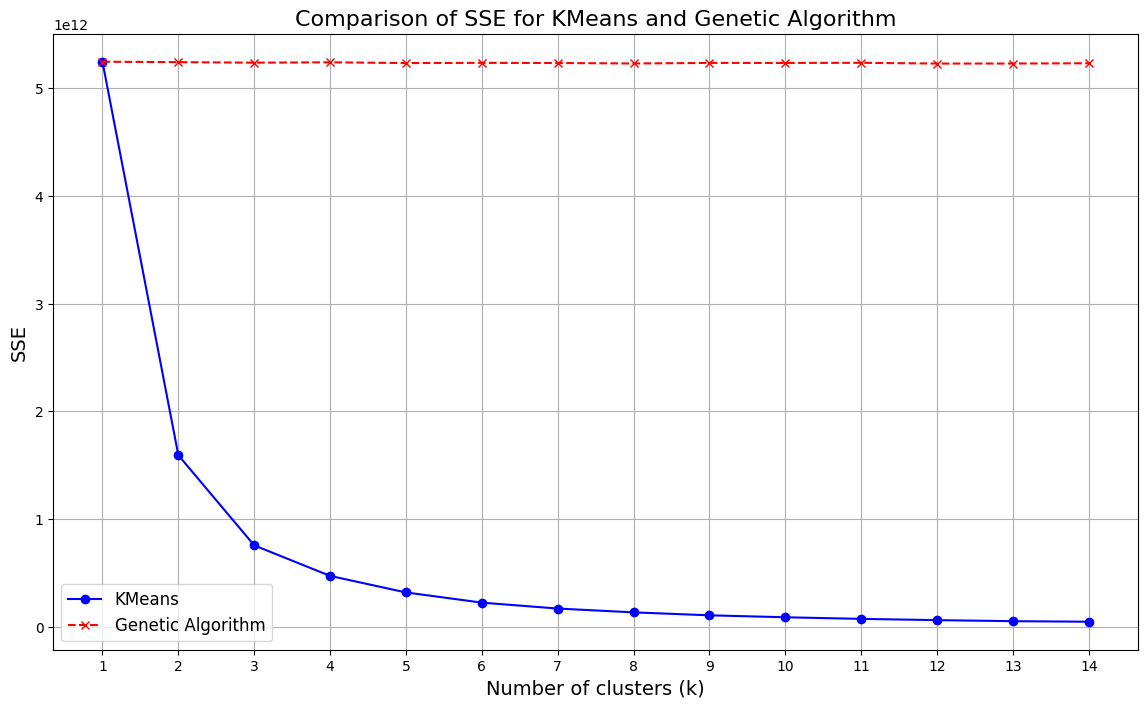

In [18]:
sse_kmeans_list = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    kmeans_clusters = kmeans.labels_
    sse_kmeans = compute_fitness(df, kmeans_clusters, k)
    sse_kmeans_list.append(sse_kmeans)

plt.figure(figsize=(14, 8))
plt.plot(range(1, 15), sse_kmeans_list, marker='o', linestyle='-', color='blue', label='KMeans')
plt.plot(range(1, 15), sse_ga_list, marker='x', linestyle='--', color='red', label='Genetic Algorithm')
plt.xlabel('Number of clusters - k', fontsize=14)
plt.ylabel('SSE', fontsize=14)
plt.title('SSE for KMeans and Genetic Algorithm', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(range(1, 15))
plt.show()


In [19]:
best_k_ga = np.argmin(np.diff(sse_ga_list, 2)) + 1
ga_clusters = genetic_clustering_algorithm(generations, population_size, df, best_k_ga, mutation_rate)

best_k_kmeans = np.argmin(np.diff(sse_kmeans_list, 2)) + 1
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=0).fit(df)
kmeans_clusters = kmeans.labels_

Generation 1: Best Individual = [0 0 0 ... 1 2 0], Fitness = 5239512508547.24
Generation 2: Best Individual = [1 0 0 ... 1 2 0], Fitness = 5238251887288.76


In [20]:
final_centroids = calculate_centroids(df, ga_clusters, best_k_ga)
final_clusters = assign_to_clusters(df, final_centroids)
print(f"centroids: {final_centroids}")
print(f"clusters: {final_clusters}")

centroids: [[4.57211730e+04 7.99619693e+02 3.01688048e+02 1.90281195e+02
  1.58331992e+00 7.51328209e-01 4.62924517e+04 2.38294450e+02
  7.50418993e-01 9.87961672e-01 8.83535724e-01 7.99971841e-01
  6.83548497e-03 1.78853330e-03 6.43736219e-01 9.95420856e-01
  0.00000000e+00 0.00000000e+00 1.41268980e-01 3.05043384e-01
  1.43980477e-01 1.65672451e-01 2.44034707e-01]
 [4.59283022e+04 8.00736794e+02 3.02335198e+02 1.90439263e+02
  1.58520335e+00 7.51404638e-01 4.64943183e+04 2.38641578e+02
  7.50609681e-01 9.88093873e-01 8.83953651e-01 7.99739726e-01
  6.83807752e-03 1.78904117e-03 6.43455608e-01 9.95531077e-01
  0.00000000e+00 0.00000000e+00 1.47035573e-01 3.13043478e-01
  1.50988142e-01 1.62845850e-01 2.26086957e-01]
 [4.48173702e+04 7.89985902e+02 2.97504832e+02 1.89227203e+02
  1.57123896e+00 7.46034554e-01 4.53660924e+04 2.35983036e+02
  7.51601692e-01 9.88196541e-01 8.87704121e-01 8.03321072e-01
  6.87262778e-03 1.82643917e-03 6.49227532e-01 9.95635935e-01
  0.00000000e+00 0.000000

In [21]:

kmeans = KMeans(n_clusters=best_k_ga, random_state=42)
kmeans_clusters = kmeans.fit_predict(df)
kmeans_score = compute_fitness(df, kmeans_clusters, best_k_ga)

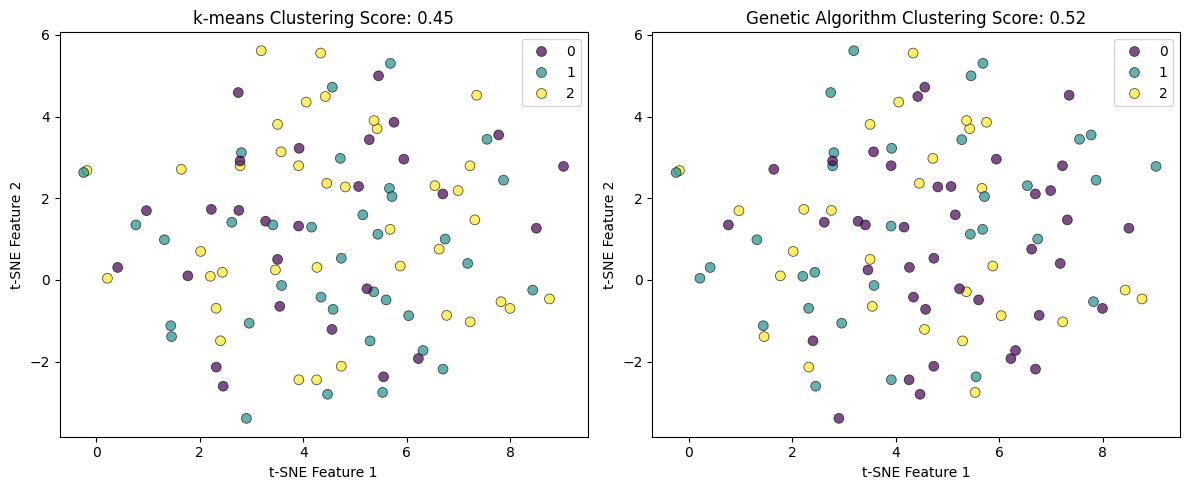

In [22]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_clusters, palette="viridis", legend='full', s=50, alpha=0.7, edgecolor='k')
plt.title(f'k-means Clustering Score: {kmeans_score}')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=final_clusters, palette="viridis", legend='full', s=50, alpha=0.7, edgecolor='k')
plt.title(f'Genetic Algorithm Clustering Score: {compute_fitness(df, final_clusters, k)}')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

plt.tight_layout()
plt.show()

